In [1]:
%matplotlib nbagg
%load_ext autoreload
%autoreload 2

In [2]:
#os.listdir(path)
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
path = '/home/bangun/Documents/Yayasan_Nusantara_Deep_Learning/lecture_notes_pdf/Python/Regresi_Linear/data_regressi.npz'

In [5]:
npts = np.load(path)

In [6]:
XX2 = npts['arr_0']

<IPython.core.display.Javascript object>


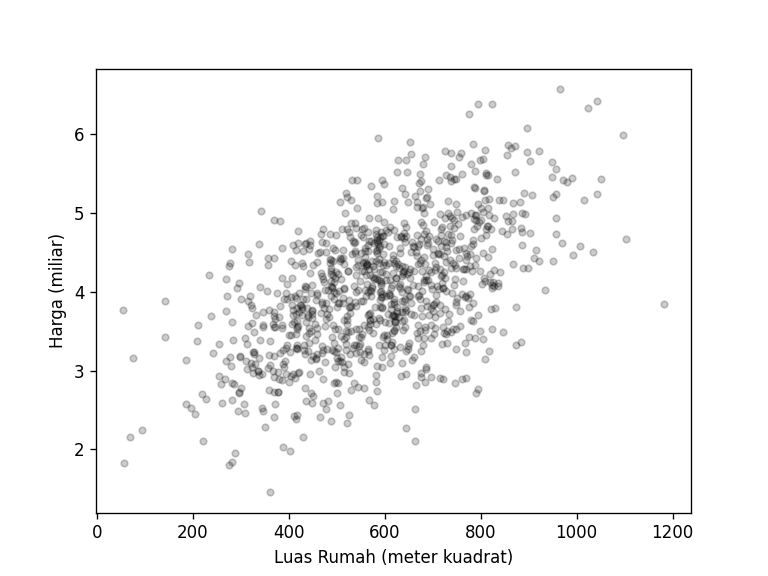

Text(0, 0.5, 'Harga (miliar)')

In [7]:
fig, ax = plt.subplots()
ax.plot(XX2[:,0] ,XX2[:,1] , 'ko', alpha=0.2, ms=4)
ax.set_xlabel('Luas Rumah (meter kuadrat)')
ax.set_ylabel('Harga (miliar)')

In [8]:
def gradient(x,y, theta_0, theta_1):
    """
    
    
    Parameters
    ----------
    x : float
    
    
    Return
    ------
    grad: float
    
    """
    m = len(x)
    grad_theta_0 = (1/m)*np.sum(theta_0 + theta_1*x - y)
    grad_theta_1 = (1/m)*np.sum((theta_0 + theta_1*x - y)*x)
    
    return grad_theta_0, grad_theta_1

def run_gradient(x, y, it, alpha, theta_0, theta_1):
 
    for it in range(it):
        # Calculate gradient
        grad_theta_0, grad_theta_1 = gradient(x, y, theta_0, theta_1)
        # Update
        theta_0 = theta_0 - alpha*grad_theta_0
        theta_1 = theta_1 - alpha*grad_theta_1
        
        # Cek kondisi critical point
        m = len(x) 
        print('Error fungsi objective :', str((1/(2*m))*np.sum((theta_0 + theta_1*x - y)**2)))
        if abs(grad_theta_0) <= 1e-6 and abs(grad_theta_1) <= 1e-6 :
            print('Solusi theta_0 dan theta_1', str(theta_0), str(theta_1))
            break
        # Append
         

     
    return theta_0, theta_1




## Gunakan Data Awal
#### Perhatikan apa yang terjadi


In [9]:
# Step Size
alpha = 1
# Iterasi
it = 1000

# Random Inisial
theta_0 = 10
theta_1 = 10 
 
x = XX2[:,0] 
y = XX2[:,1] 
theta_0, theta_1 = run_gradient(x, y, it, alpha, theta_0, theta_1)

Error fungsi objective : 2.674414210406645e+18
Error fungsi objective : 3.792038477721969e+29
Error fungsi objective : 5.376712313511655e+40
Error fungsi objective : 7.623613386864863e+51
Error fungsi objective : 1.0809483134578562e+63
Error fungsi objective : 1.5326711850060085e+74
Error fungsi objective : 2.1731667759702808e+85
Error fungsi objective : 3.081322257756516e+96
Error fungsi objective : 4.3689913545206666e+107
Error fungsi objective : 6.194770900001286e+118
Error fungsi objective : 8.783534548264851e+129
Error fungsi objective : 1.2454129524071055e+141
Error fungsi objective : 1.7658647706119488e+152
Error fungsi objective : 2.503810789876123e+163
Error fungsi objective : 3.550140744541606e+174
Error fungsi objective : 5.0337267324732603e+185
Error fungsi objective : 7.137295854023282e+196
Error fungsi objective : 1.0119935947104679e+208
Error fungsi objective : 1.434900635592559e+219
Error fungsi objective : 2.034538404971817e+230
Error fungsi objective : 2.8847617867253

<ipython-input-8-4861c3d53276>:32: RuntimeWarning: overflow encountered in square
  print('Error fungsi objective :', str((1/(2*m))*np.sum((theta_0 + theta_1*x - y)**2)))
/home/bangun/Documents/ERC1_Data/libertem-venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-8-4861c3d53276>:28: RuntimeWarning: invalid value encountered in double_scalars
  theta_1 = theta_1 - alpha*grad_theta_1


Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi objective : nan
Error fungsi o

# Terjadi divergensi pada algoritma sehingga tidak dapat memberikan nilai optimal, apa yang harus kita lakukan? Normalisasi merupakan salah satu cara

In [10]:
persamaan_garis_grad_awal = theta_0 + theta_1*x

<IPython.core.display.Javascript object>


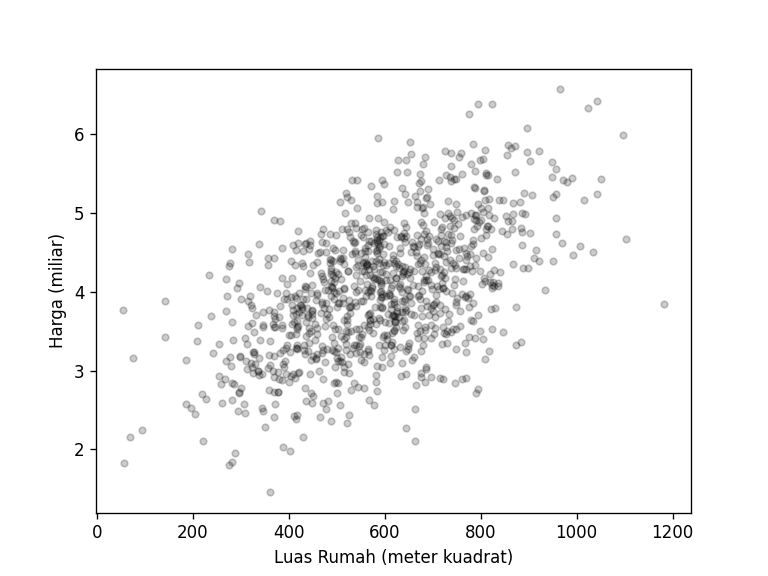

Text(0, 0.5, 'Harga (miliar)')

In [11]:
fig, ax = plt.subplots()

ax.plot(x ,y , 'ko', alpha=0.2, ms=4)
ax.plot(x,persamaan_garis_grad_awal) 
ax.set_xlabel('Luas Rumah (meter kuadrat)')
ax.set_ylabel('Harga (miliar)')

## Gunakan Normalisasi
#### Normalisasi sangat berguna untuk mempercepat konvergensi ke optimal pada metode gradient, data yang kita miliki kemungkinan sangat bervariasi atau perbedaan satu dengan yang lain cukup besar sehingga sangat susah untuk mendapatkan optimal, dalam data sains, normalisasi perlu dilakukan untuk membuat data lebih gampang divisualisasi dan di proses

In [12]:
# Step Size
alpha = 1
# Iterasi
it = 1000

# Random Inisial
theta_0 = 10
theta_1 = 10 

normalisasi_x = np.max(XX2[:,0])
normalisasi_y = np.max(XX2[:,1])
x = XX2[:,0]/normalisasi_x
y = XX2[:,1]/normalisasi_y
theta_0, theta_1 = run_gradient(x, y, it, alpha, theta_0, theta_1)

Error fungsi objective : 6.762815122882757
Error fungsi objective : 0.5641983151951995
Error fungsi objective : 0.16561522595763142
Error fungsi objective : 0.13604636595451478
Error fungsi objective : 0.13008862969478896
Error fungsi objective : 0.12577048342190528
Error fungsi objective : 0.12168992730560214
Error fungsi objective : 0.117753286103111
Error fungsi objective : 0.11395024316087733
Error fungsi objective : 0.1102759307332586
Error fungsi objective : 0.10672597014538959
Error fungsi objective : 0.10329615153716383
Error fungsi objective : 0.0999824088352377
Error fungsi objective : 0.09678081365846532
Error fungsi objective : 0.09368757057983854
Error fungsi objective : 0.09069901262193042
Error fungsi objective : 0.08781159690943968
Error fungsi objective : 0.08502190046916237
Error fungsi objective : 0.08232661617212475
Error fungsi objective : 0.0797225488130485
Error fungsi objective : 0.0772066113224989
Error fungsi objective : 0.07477582110722643
Error fungsi object

Error fungsi objective : 0.005430027184713319
Error fungsi objective : 0.00542838339735849
Error fungsi objective : 0.005426795240962271
Error fungsi objective : 0.005425260832797223
Error fungsi objective : 0.005423778353853351
Error fungsi objective : 0.005422346046681713
Error fungsi objective : 0.005420962213310987
Error fungsi objective : 0.005419625213234569
Error fungsi objective : 0.00541833346146578
Error fungsi objective : 0.005417085426658904
Error fungsi objective : 0.0054158796292937995
Error fungsi objective : 0.005414714639921961
Error fungsi objective : 0.005413589077471942
Error fungsi objective : 0.005412501607612113
Error fungsi objective : 0.005411450941168847
Error fungsi objective : 0.005410435832598224
Error fungsi objective : 0.00540945507850947
Error fungsi objective : 0.005408507516238353
Error fungsi objective : 0.005407592022468876
Error fungsi objective : 0.005406707511901603
Error fungsi objective : 0.0054058529359670635
Error fungsi objective : 0.00540502

In [13]:
persamaan_garis_grad = theta_0 + theta_1*x

<IPython.core.display.Javascript object>


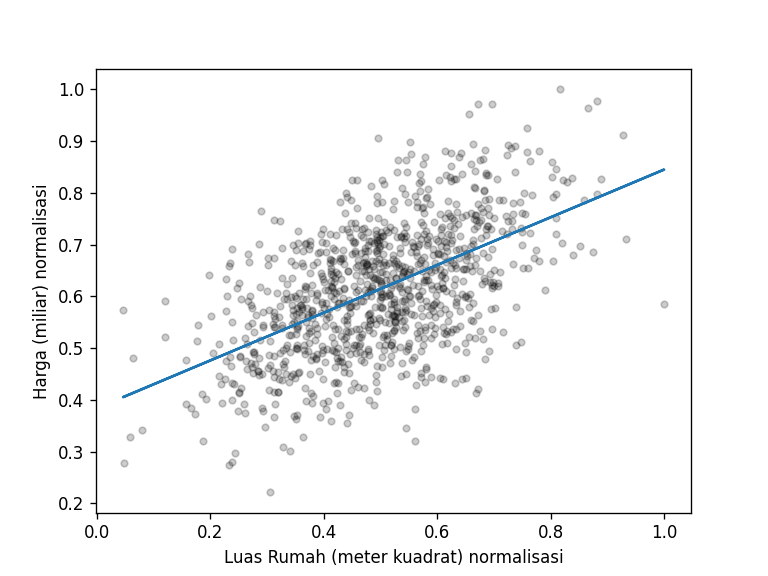

Text(0, 0.5, 'Harga (miliar) normalisasi')

In [14]:
fig, ax = plt.subplots()

ax.plot(x ,y , 'ko', alpha=0.2, ms=4)
ax.plot(x,persamaan_garis_grad) 
ax.set_xlabel('Luas Rumah (meter kuadrat) normalisasi')
ax.set_ylabel('Harga (miliar) normalisasi')


## Least Square Metode

In [15]:
A = np.ones_like(XX2)
A[:,1] = x

In [16]:
def least_square(x,y,A):
    
    return np.linalg.pinv(A.T@A)@A.T@y
    

In [17]:
theta = least_square(x,y,A)

In [18]:
persamaan_garis_ls = theta[0] + theta[1]*x

<IPython.core.display.Javascript object>


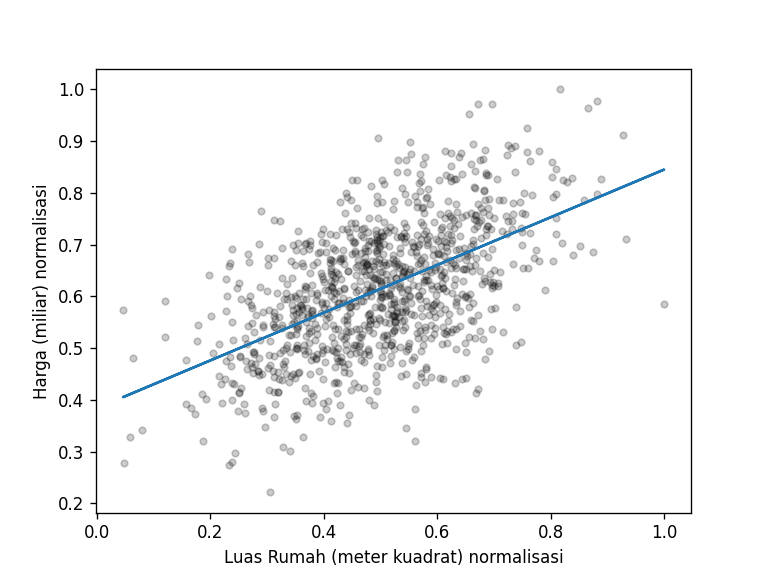

Text(0, 0.5, 'Harga (miliar) normalisasi')

In [19]:
fig, ax = plt.subplots()

ax.plot(x ,y , 'ko', alpha=0.2, ms=4)
ax.plot(x,persamaan_garis_ls) 
ax.set_xlabel('Luas Rumah (meter kuadrat) normalisasi')
ax.set_ylabel('Harga (miliar) normalisasi')